# Simple Linear Regression. Minimal example

# Using the same code as before, please solve the following exercises
    1. Change the number of observations to 100,000 and see what happens.
    2. Change the number of observations to 1,000,000 and see what happens.
    3. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe. 
    4. Change the loss function. L2-norm loss (without dividing by 2) is a good way to start. 
    5. Тry with the L1-norm loss, given by the sum of the ABSOLUTE value of yj - tj. The L1-norm loss is given by:
## $$ \Sigma_i = |y_i-t_i| $$
    6. Create a function f(x,z) = 13*xs + 7*zs - 12. Does the algorithm work in the same way?
    
    
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

You can either use this file for all the exercises, or check the solutions of EACH ONE of them in the separate files we have provided. All other files are solutions of each problem. If you feel confident enough, you can simply change values in this file. Please note that it will be nice, if you return the file to starting position after you have solved a problem, so you can use the lecture as a basis for comparison.

## Import the relevant libraries

In [1]:
# We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.
import numpy as np

# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Change number of observations to 100,000

### Generate random input data to train on

In [3]:
# First, we should declare a variable containing the size of the training set we want to generate.
n = 100000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(-10,10,size=(n,1))
zs = np.random.uniform(-10,10,size=(n,1))


# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(100000, 2)


### Generate the targets we will aim at

In [4]:
noise = np.random.uniform(-10,10,size=(n,1))

targets = 2*xs + 3*zs + 5 + noise

print(targets)

[[ -3.5356769 ]
 [ 17.14573119]
 [ 41.26195759]
 ...
 [-23.49701244]
 [  5.59154225]
 [ 24.86887957]]


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

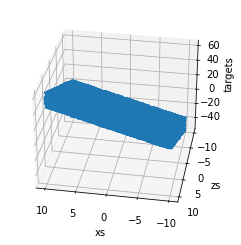

In [5]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(n,)

# Reshape xs and zs to match the shape of the target
xs = xs.reshape(n,)
zs = zs.reshape(n,)

# Plotting according to the conventional matplotlib.pyplot syntax
# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection = '3d')

# Choose the axes.
ax.plot(xs,zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')


# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot.
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(n,1)

### Initialize variables

In [6]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(-init_range, init_range, size = (2,1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(-init_range, init_range, size = 1)

# Print the weights and biases to get a sense of how they were initiliazed
print(weights)
print(weights.shape)

print('\n',biases)
print(biases.shape)

[[-0.0669953 ]
 [ 0.00384055]]
(2, 1)

 [-0.0794147]
(1,)


### Set a learning rate

In [7]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

### Train the model

In [8]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# The proper number of iterations is something we will talk about later on, but generally
# a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# keep in mind that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.

losses = []

for i in range (1000):
    
    # This is the linear model: y = xw + b equation
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    # We are considering the L2-norm loss, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss = np.sum(deltas ** 2)
    loss = loss / 2 / n
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print(i, loss)
    
    losses.append(loss)
    
    # Check if the difference between previous and current loss is less than or equal to the threshold
    if i > 0 and abs(losses[i] - losses[i-1]) <= 1e-8: # You can set this number arbitary 
        break
    
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    deltas_scaled = deltas / n
    
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled)
    
    biases = biases - learning_rate*np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

0 252.07009768174083
1 53.64844508783911
2 31.339568817882625
3 28.461818215677255
4 27.74286508749991
5 27.2778466180782
6 26.856105205218647
7 26.45380636348536
8 26.06774058646883
9 25.696995974072212
10 25.340936139900876
11 24.99897630708402
12 24.670557768995412
13 24.355144264714244
14 24.052220804170723
15 23.761292794276965
16 23.481885227743778
17 23.213541907119012
18 22.95582469989532
19 22.708312823152653
20 22.47060215653229
21 22.24230458241691
22 22.023047352238816
23 21.812472477881744
24 21.610236147182523
25 21.416008162578166
26 21.229471401982106
27 21.05032130100899
28 20.878265355702982
29 20.713022644957398
30 20.554323371846035
31 20.401908423117376
32 20.25552894613225
33 20.11494594255441
34 19.979929878130452
35 19.850260307922134
36 19.72572551637901
37 19.606122171663877
38 19.491254993666523
39 19.380936435163814
40 19.2749863756055
41 19.173231827025763
42 19.075506651600374
43 18.98165129038831
44 18.89151250281485
45 18.80494311647095
46 18.72180178682

### Print weights and biases and see if we have worked correctly.

In [9]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be converging. So more iterations are needed.
# In this case, the iterations stops at 441

[[2.00750938]
 [3.00173874]] [5.0090276]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

Text(0, 0.5, 'targets')

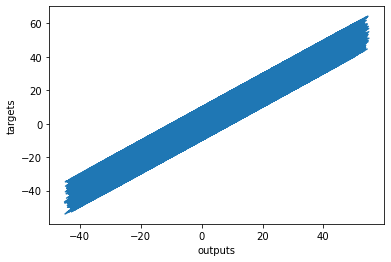

In [10]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')

## 2. Change number of observations to 1,000,000

In [2]:
# First, we should declare a variable containing the size of the training set we want to generate.
n = 1000000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(-10,10,size=(n,1))
zs = np.random.uniform(-10,10,size=(n,1))


# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000000, 2)


### Generate the targets we will aim at

In [3]:
noise = np.random.uniform(-10,10,size=(n,1))

targets = 2*xs + 3*zs + 5 + noise

print(targets)

[[  5.86715105]
 [ -2.78934547]
 [  8.87754043]
 ...
 [-48.15904865]
 [-12.24420427]
 [ -0.61763298]]


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

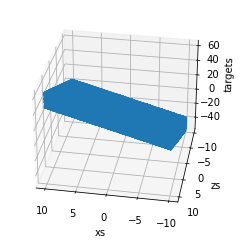

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(n,)

# Reshape xs and zs to match the shape of the target
xs = xs.reshape(n,)
zs = zs.reshape(n,)

# Plotting according to the conventional matplotlib.pyplot syntax
# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection = '3d')

# Choose the axes.
ax.plot(xs,zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')


# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot.
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(n,1)

### Initialize variables

In [5]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(-init_range, init_range, size = (2,1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(-init_range, init_range, size = 1)

# Print the weights and biases to get a sense of how they were initiliazed
print(weights)
print(weights.shape)

print('\n',biases)
print(biases.shape)

[[-0.06378951]
 [-0.07981273]]
(2, 1)

 [0.07551982]
(1,)


### Set a learning rate

In [6]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

### Train the model

In [7]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# The proper number of iterations is something we will talk about later on, but generally
# a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# keep in mind that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.

losses = []

for i in range (1000):
    
    # This is the linear model: y = xw + b equation
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    # We are considering the L2-norm loss, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss = np.sum(deltas ** 2)
    loss = loss / 2 / n
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print(i, loss)
    
    losses.append(loss)
    
    # Check if the difference between previous and current loss is less than or equal to the threshold
    if i > 0 and abs(losses[i] - losses[i-1]) <= 1e-8: # You can set this number arbitary 
        break
    
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    deltas_scaled = deltas / n
    
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled)
    
    biases = biases - learning_rate*np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

0 258.10950001573576
1 53.824684225288486
2 30.718450630004146
3 27.758896606486072
4 27.05334592448437
5 26.613152542244443
6 26.21676994717103
7 25.83901504666761
8 25.47654488823904
9 25.128464725430582
10 24.794172551919686
11 24.473118789987684
12 24.164778801688033
13 23.86864907766579
14 23.584246086742848
15 23.311105449925467
16 23.0487811781049
17 22.796844943388
18 22.554885379665546
19 22.322507410920537
20 22.099331606140197
21 21.884993559773985
22 21.67914329672553
23 21.48144470090686
24 21.29157496642185
25 21.109224070482924
26 20.934094267200052
27 20.76589960141584
28 20.604365441792744
29 20.449228032389865
30 20.30023406199752
31 20.15714025052602
32 20.01971295177344
33 19.88772777192383
34 19.7609692031529
35 19.639230271742825
36 19.522312200131857
37 19.410024082346574
38 19.302182572287172
39 19.19861158435653
40 19.09914200594447
41 19.003611421297556
42 18.911863846323683
43 18.82374947389833
44 18.739124429256865
45 18.65785053507305
46 18.57979508584064
4

### Print weights and biases and see if we have worked correctly.

In [8]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be converging. So more iterations are needed.
# In this case, the iterations stops at 439
# This means that higher sample size introduces more points for the model to learn and reduce the impact of the noise.

[[2.00134622]
 [3.00075601]] [5.00330823]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

In [9]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')

Text(0, 0.5, 'targets')


KeyboardInterrupt



<Figure size 432x288 with 1 Axes>

## 3. Change learning rate (0.0001, 0.001, 0.1, 1)

In [2]:
# First, we should declare a variable containing the size of the training set we want to generate.
n = 100000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(-10,10,size=(n,1))
zs = np.random.uniform(-10,10,size=(n,1))


# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(100000, 2)


### Generate the targets we will aim at

In [3]:
noise = np.random.uniform(-10,10,size=(n,1))

targets = 2*xs + 3*zs + 5 + noise

print(targets)

[[ 11.29556917]
 [ 14.03442996]
 [-24.66474183]
 ...
 [-11.39397451]
 [ 33.95352818]
 [ 36.78009627]]


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

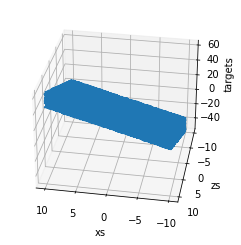

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(n,)

# Reshape xs and zs to match the shape of the target
xs = xs.reshape(n,)
zs = zs.reshape(n,)

# Plotting according to the conventional matplotlib.pyplot syntax
# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection = '3d')

# Choose the axes.
ax.plot(xs,zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')


# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot.
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(n,1)

### Initialize variables

In [5]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(-init_range, init_range, size = (2,1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(-init_range, init_range, size = 1)

# Print the weights and biases to get a sense of how they were initiliazed
print(weights)
print(weights.shape)

print('\n',biases)
print(biases.shape)

[[-0.01146419]
 [ 0.03528758]]
(2, 1)

 [-0.01511892]
(1,)


### Set a learning rate

In [6]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.

# For this set, we set the learning rate here according to the testing values
learning_rate = 0.1

### Train the model

In [7]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# The proper number of iterations is something we will talk about later on, but generally
# a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# keep in mind that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.

losses = []

for i in range (10000):
    
    # This is the linear model: y = xw + b equation
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    # We are considering the L2-norm loss, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss = np.sum(deltas ** 2)
    loss = loss / 2 / n
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print(i, loss)
    
    losses.append(loss)
    
    # Check if the difference between previous and current loss is less than or equal to the threshold
    if i > 0 and abs(losses[i] - losses[i-1]) <= 1e-8: # You can set this number arbitary 
        break
    
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    deltas_scaled = deltas / n
    
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled)
    
    biases = biases - learning_rate*np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

0 242.07057693520395
1 1179.7501416034127
2 6271.366840073554
3 33867.82200636089
4 183399.01851075084
5 993601.2186269352
6 5383489.003917941
7 29169089.136741005
8 158046221.44543025
9 856340915.0168976
10 4639919652.459096
11 25140586586.51004
12 136220211629.2033
13 738089307608.9321
14 3999240473577.3813
15 21669425074789.01
16 117413638758731.48
17 636196123609597.8
18 3447186869579515.0
19 1.8678414000909196e+16
20 1.012083990211082e+17
21 5.483963128134234e+17
22 2.971487700350989e+18
23 1.6101072825038533e+19
24 8.72443247232454e+19
25 4.7273861488331063e+20
26 2.561571727548957e+21
27 1.3880130293573658e+22
28 7.5211140216475565e+22
29 4.075420640252176e+23
30 2.2083320579556999e+24
31 1.1966248377000656e+25
32 6.484154883099281e+25
33 3.5135853710807884e+26
34 1.903923245670227e+27
35 1.0316923058383126e+28
36 5.590527782806765e+28
37 3.029404918124249e+29
38 1.6415865114496374e+30
39 8.89553744777206e+30
40 4.820394858515067e+31
41 2.612131755178109e+32
42 1.415499182494862

C:\Users\qayyim\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\qayyim\AppData\Local\Temp\ipykernel_2700\494540342.py:30: RuntimeWarning: invalid value encountered in double_scalars
  if i > 0 and abs(losses[i] - losses[i-1]) <= 1e-8: # You can set this number arbitary
C:\Users\qayyim\AppData\Local\Temp\ipykernel_2700\494540342.py:21: RuntimeWarning: overflow encountered in square
  loss = np.sum(deltas ** 2)


inf
428 inf
429 inf
430 inf
431 inf
432 inf
433 inf
434 inf
435 inf
436 inf
437 inf
438 inf
439 inf
440 inf
441 inf
442 inf
443 inf
444 inf
445 inf
446 inf
447 inf
448 inf
449 inf
450 inf
451 inf
452 inf
453 inf
454 inf
455 inf
456 inf
457 inf
458 inf
459 inf
460 inf
461 inf
462 inf
463 inf
464 inf
465 inf
466 inf
467 inf
468 inf
469 inf
470 inf
471 inf
472 inf
473 inf
474 inf
475 inf
476 inf
477 inf
478 inf
479 inf
480 inf
481 inf
482 inf
483 inf
484 inf
485 inf
486 inf
487 inf
488 inf
489 inf
490 inf
491 inf
492 inf
493 inf
494 inf
495 inf
496 inf
497 inf
498 inf
499 inf
500 inf
501 inf
502 inf
503 inf
504 inf
505 inf
506 inf
507 inf
508 inf
509 inf
510 inf
511 inf
512 inf
513 inf
514 inf
515 inf
516 inf
517 inf
518 inf
519 inf
520 inf
521 inf
522 inf
523 inf
524 inf
525 inf
526 inf
527 inf
528 inf
529 inf
530 inf
531 inf
532 inf
533 inf
534 inf
535 inf
536 inf
537 inf
538 inf
539 inf
540 inf
541 inf
542 inf
543 inf
544 inf
545 inf
546 inf
547 inf
548 inf
549 inf
550 inf
551 inf
552 

C:\Users\qayyim\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


868 nan
869 nan
870 nan
871 nan
872 nan
873 nan
874 nan
875 nan
876 nan
877 nan
878 nan
879 nan
880 nan
881 nan
882 nan
883 nan
884 nan
885 nan
886 nan
887 nan
888 nan
889 nan
890 nan
891 nan
892 nan
893 nan
894 nan
895 nan
896 nan
897 nan
898 nan
899 nan
900 nan
901 nan
902 nan
903 nan
904 nan
905 nan
906 nan
907 nan
908 nan
909 nan
910 nan
911 nan
912 nan
913 nan
914 nan
915 nan
916 nan
917 nan
918 nan
919 nan
920 nan
921 nan
922 nan
923 nan
924 nan
925 nan
926 nan
927 nan
928 nan
929 nan
930 nan
931 nan
932 nan
933 nan
934 nan
935 nan
936 nan
937 nan
938 nan
939 nan
940 nan
941 nan
942 nan
943 nan
944 nan
945 nan
946 nan
947 nan
948 nan
949 nan
950 nan
951 nan
952 nan
953 nan
954 nan
955 nan
956 nan
957 nan
958 nan
959 nan
960 nan
961 nan
962 nan
963 nan
964 nan
965 nan
966 nan
967 nan
968 nan
969 nan
970 nan
971 nan
972 nan
973 nan
974 nan
975 nan
976 nan
977 nan
978 nan
979 nan
980 nan
981 nan
982 nan
983 nan
984 nan
985 nan
986 nan
987 nan
988 nan
989 nan
990 nan
991 nan
992 nan


### Print weights and biases and see if we have worked correctly.

In [ ]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be converging. So more iterations are needed.
# In this case, lowering the learnign rate would mean a lot of iterations would have to be made in order to converge
# 0.0001: >1,000 iterations
# 0.001: 7,371 iterations (significantly better than 0.0001)
# 0.1: Values oscilatting and eventually becomes infinity

# Conclusion, to big of the learning rate would cause the values to oscillate, hence no minization point will be reached

### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

In [ ]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')

## 4. Change the loss function. L2-norm loss (without dividing by 2) and comparing with the 1.

### Generate random input data to train on

In [2]:
# First, we should declare a variable containing the size of the training set we want to generate.
n = 100000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(-10,10,size=(n,1))
zs = np.random.uniform(-10,10,size=(n,1))


# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(100000, 2)


### Generate the targets we will aim at

In [3]:
noise = np.random.uniform(-10,10,size=(n,1))

targets = 2*xs + 3*zs + 5 + noise

print(targets)

[[ 10.99544549]
 [-23.18294887]
 [ -6.24343754]
 ...
 [  2.72888424]
 [ 19.87843769]
 [ -8.51835914]]


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

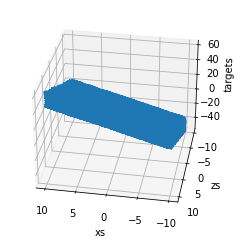

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(n,)

# Reshape xs and zs to match the shape of the target
xs = xs.reshape(n,)
zs = zs.reshape(n,)

# Plotting according to the conventional matplotlib.pyplot syntax
# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection = '3d')

# Choose the axes.
ax.plot(xs,zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')


# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot.
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(n,1)

### Initialize variables

In [5]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(-init_range, init_range, size = (2,1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(-init_range, init_range, size = 1)

# Print the weights and biases to get a sense of how they were initiliazed
print(weights)
print(weights.shape)

print('\n',biases)
print(biases.shape)

[[ 0.00789125]
 [-0.01505929]]
(2, 1)

 [0.0006529]
(1,)


### Set a learning rate

In [6]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

### Train the model

In [7]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# The proper number of iterations is something we will talk about later on, but generally
# a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# keep in mind that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.

losses = []

for i in range (1000):
    
    # This is the linear model: y = xw + b equation
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    # We are considering the L2-norm loss, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss = np.sum(deltas ** 2)
    loss = loss / n
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print(i, loss)
    
    losses.append(loss)
    
    # Check if the difference between previous and current loss is less than or equal to the threshold
    if i > 0 and abs(losses[i] - losses[i-1]) <= 1e-8: # You can set this number arbitary 
        break
    
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    deltas_scaled = deltas / n
    
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled)
    
    biases = biases - learning_rate*np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

0 496.1743053353182
1 105.22491073931114
2 61.69066065078537
3 56.12749330070589
4 54.742842674878574
5 53.84526616212819
6 53.030433531490786
7 52.253020612868184
8 51.50695393022253
9 50.79049082148478
10 50.10240430996414
11 49.44156478365875
12 48.806892687035905
13 48.197351793620314
14 47.61194697206512
15 47.04972250230853
16 46.50976050881954
17 45.99117946138787
18 45.49313273588002
19 45.01480723205057
20 44.55542204609156
21 44.11422719574577
22 43.69050239590211
23 43.283555882673674
24 42.89272328403917
25 42.51736653520361
26 42.15687283690755
27 41.810653654984456
28 41.478143759532536
29 41.15880030213274
30 40.85210192960626
31 40.55754793286466
32 40.274657429463126
33 40.00296857852219
34 39.74203782673651
35 39.49143918423921
36 39.250763529140244
37 39.01961793960281
38 38.79762505236775
39 38.584422446678516
40 38.379662052600885
41 38.18300958277162
42 37.99414398664813
43 37.812756926368394
44 37.63855227336523
45 37.471245624913315
46 37.31056383981939
47 37.15

### Print weights and biases and see if we have worked correctly.

In [8]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be converging. So more iterations are needed.
# In this case, the iterations stops at 457. 
# Comparing this iteration result with 1., it is observed that this takes longer but hardly ever shows any improvement
# Dividing the loss by 2 does not improve the convergence rate itself. 
# It is simply a scaling factor that affects the value of the loss function, but it does not alter the optimization process or the rate at which the model converges.

[[2.0000153 ]
 [3.00010063]] [4.98756137]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

In [ ]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')

## 5. Тry with the L1-norm loss, given by the sum of the ABSOLUTE value of yj - tj.

### Generate random input data to train on

In [2]:
# First, we should declare a variable containing the size of the training set we want to generate.
n = 100000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(-10,10,size=(n,1))
zs = np.random.uniform(-10,10,size=(n,1))


# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(100000, 2)


### Generate the targets we will aim at

In [3]:
noise = np.random.uniform(-10,10,size=(n,1))

targets = 2*xs + 3*zs + 5 + noise

print(targets)

[[ 27.64130156]
 [-27.856152  ]
 [-15.14926194]
 ...
 [  2.20956627]
 [ 11.05766096]
 [ -7.61865906]]


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

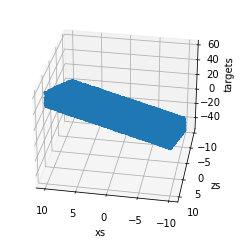

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(n,)

# Reshape xs and zs to match the shape of the target
xs = xs.reshape(n,)
zs = zs.reshape(n,)

# Plotting according to the conventional matplotlib.pyplot syntax
# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection = '3d')

# Choose the axes.
ax.plot(xs,zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')


# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot.
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(n,1)

### Initialize variables

In [5]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(-init_range, init_range, size = (2,1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(-init_range, init_range, size = 1)

# Print the weights and biases to get a sense of how they were initiliazed
print(weights)
print(weights.shape)

print('\n',biases)
print(biases.shape)

[[ 0.06202589]
 [-0.05655051]]
(2, 1)

 [-0.05099046]
(1,)


### Set a learning rate

In [6]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

### Train the model

In [7]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# The proper number of iterations is something we will talk about later on, but generally
# a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# keep in mind that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.

losses = []

for i in range (1000):
    
    # This is the linear model: y = xw + b equation
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    # We are considering the L1-norm loss this time, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss = np.sum(np.absolute(deltas)) / 2 
    loss = loss / n
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print(i, loss)
    
    losses.append(loss)
    
    # Check if the difference between previous and current loss is less than or equal to the threshold
    if i > 0 and abs(losses[i] - losses[i-1]) <= 1e-8: # You can set this number arbitary 
        break
    
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    deltas_scaled = deltas / n
    
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled)
    
    biases = biases - learning_rate*np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

0 9.125846084542061
1 4.186511931934158
2 3.2265064154512655
3 3.0817224957302085
4 3.0453263398333363
5 3.021973283151012
6 3.00087592859259
7 2.9807829822451697
8 2.961495387307255
9 2.942976253931056
10 2.9251960859253856
11 2.9081281986152456
12 2.891758359501309
13 2.8760440421260784
14 2.8609519957016416
15 2.8464602373225265
16 2.8325524525945065
17 2.8191881415980355
18 2.806341364268233
19 2.794004838803179
20 2.7821594470648052
21 2.770795916134817
22 2.759904196348659
23 2.749451798651011
24 2.739411127778325
25 2.72975801704423
26 2.720491687735038
27 2.7115959594985926
28 2.7030752053326195
29 2.6949046683561795
30 2.687064904650295
31 2.67954200047447
32 2.672323636295223
33 2.66539884748862
34 2.658751179136607
35 2.6523624648816946
36 2.6462404235738415
37 2.6403601834051993
38 2.6347182152234225
39 2.6292947038053542
40 2.62409316791364
41 2.6191066337695603
42 2.6143136010381998
43 2.609713260873392
44 2.6052979936631164
45 2.6010557031059327
46 2.5969845588305547
47 

### Print weights and biases and see if we have worked correctly.

In [8]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be converging. So more iterations are needed.
# In this case, the iterations stops at 259, which is faster than L2 norm loss.
# Based on what we know about L1-norm Loss, this can be contributed to several reasons:
# 1. Robustness to outliers: The L1 norm loss is less sensitive to outliers, which means that extreme values in the target or predicted outputs have less influence on the loss. This robustness allows the optimization algorithm to converge faster as it is not heavily affected by outliers.
# 2. Sparse solutions: The L1 norm loss promotes sparsity in the weights of the model. By encouraging some weights to be zero, the model can focus on a subset of the most relevant features. This sparsity leads to a simpler optimization problem and can result in faster convergence.
# 3. Less emphasis on individual data points: The L1 norm loss treats all errors equally and does not heavily penalize large errors. This property means that the optimization algorithm can focus more on the overall trend or direction of the predictions rather than minimizing errors for individual data points. Consequently, the algorithm may converge faster as it does not need to fine-tune predictions for each data point.

[[2.00067487]
 [2.9971883 ]] [4.98473044]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

In [ ]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')